### 特征匹配

####  Brute-Force蛮力匹配

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img1 = cv2.imread('images/box.png', 0)
img2 = cv2.imread('images/box_in_scene.png', 0)

In [10]:
def cv_show(name,img):
    plt.figure(name) # 图像窗口名称
    plt.imshow(img, cmap = plt.cm.gray)
    plt.show()

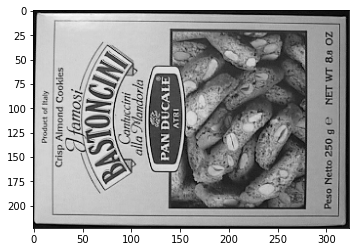

In [11]:
cv_show('img1',img1)

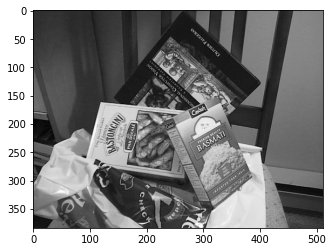

In [12]:
cv_show('img2',img2)

In [13]:
sift = cv2.xfeatures2d.SIFT_create()

In [14]:
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [15]:
# crossCheck表示两个特征点要互相匹，例如A中的第i个特征点与B中的第j个特征点最近的，并且B中的第j个特征点到A中的第i个特征点也是 
#NORM_L2: 归一化数组的(欧几里德距离)，如果其他特征计算方法需要考虑不同的匹配计算方式
bf = cv2.BFMatcher(crossCheck=True)

#### 1对1的匹配

In [16]:
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [17]:
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None,flags=2)

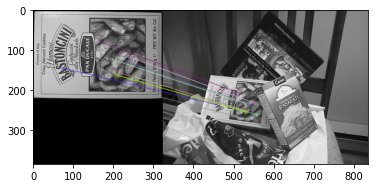

In [18]:
cv_show('img3',img3)

#### k对最佳匹配

In [19]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [20]:
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

In [21]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

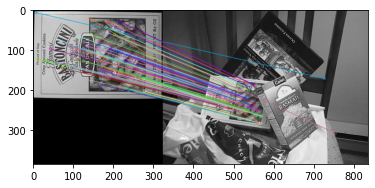

In [22]:
cv_show('img3',img3)

如果需要更快速完成操作，可以尝试使用cv2.FlannBasedMatcher

### 随机抽样一致算法（Random sample consensus，RANSAC）

![title](images/ransac_1.png)

选择初始样本点进行拟合，给定一个容忍范围，不断进行迭代

![title](images/ransac_2.png)

每一次拟合后，容差范围内都有对应的数据点数，找出数据点个数最多的情况，就是最终的拟合结果

![title](images/ransac_3.png)

#### 单应性矩阵

![title](images/ransac_4.png)